In [1]:
import matplotlib.pyplot as plt
import numpy as np

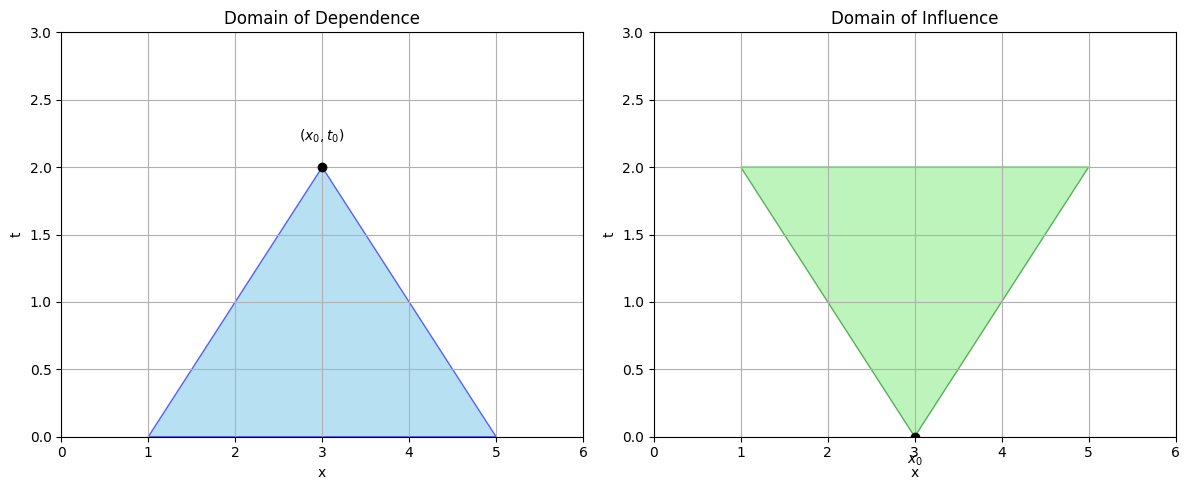

In [2]:
#Problem 1b

a = 1
t0 = 2
x0 = 3

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

x_dep = [x0 - a*t0, x0, x0 + a*t0]
t_dep = [0, t0, 0]
axs[0].fill(x_dep, t_dep, color='skyblue', alpha=0.6, edgecolor='blue')
axs[0].plot(x0, t0, 'ko')
axs[0].text(x0, t0 + 0.2, r'$(x_0, t_0)$', ha='center')
axs[0].set_title("Domain of Dependence")
axs[0].set_xlabel("x")
axs[0].set_ylabel("t")
axs[0].set_xlim(x0 - a*t0 - 1, x0 + a*t0 + 1)
axs[0].set_ylim(0, t0 + 1)
axs[0].grid(True)

t_max = 2
x_inf = [x0 - a*t_max, x0, x0 + a*t_max]
t_inf = [t_max, 0, t_max]
axs[1].fill(x_inf, t_inf, color='lightgreen', alpha=0.6, edgecolor='green')
axs[1].plot(x0, 0, 'ko')
axs[1].text(x0, -0.2, r'$x_0$', ha='center')
axs[1].set_title("Domain of Influence")
axs[1].set_xlabel("x")
axs[1].set_ylabel("t")
axs[1].set_xlim(x0 - a*t_max - 1, x0 + a*t_max + 1)
axs[1].set_ylim(0, t_max + 1)
axs[1].grid(True)

plt.tight_layout()
plt.show()



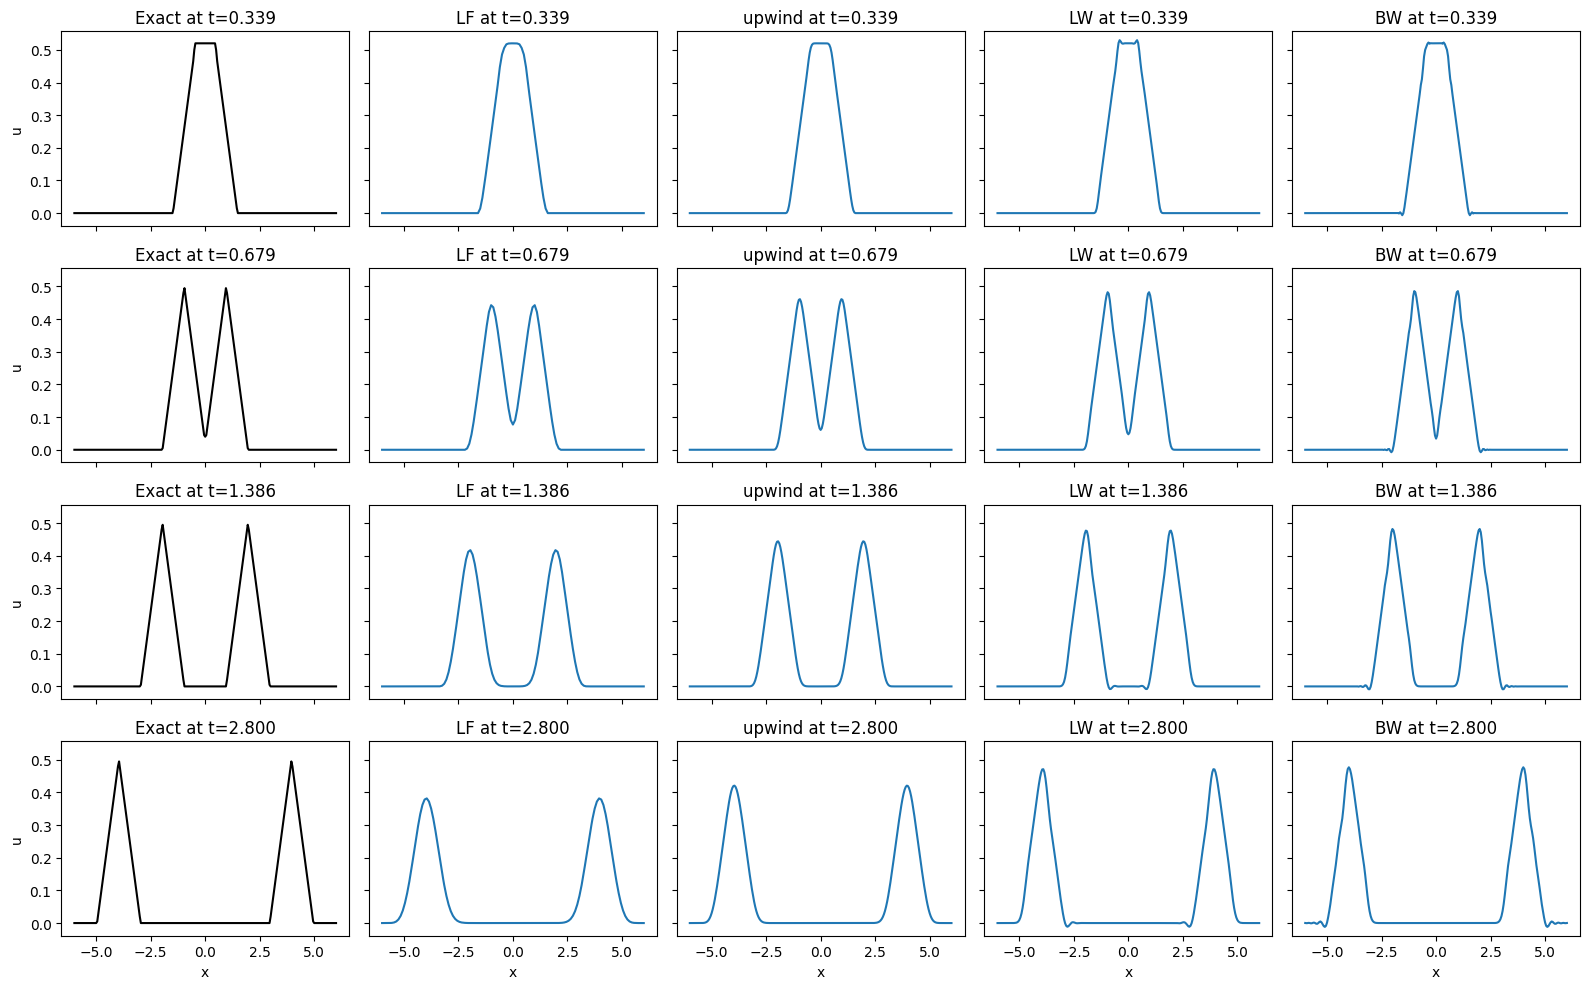

In [3]:
#Problem 1e

a = np.sqrt(2)
h = 0.05
x_min, x_max = -6, 6
x = np.arange(x_min, x_max + h, h)
N = len(x)
CFL = 0.8
k = CFL * h / a
t_values = [0.5 / a, 1 / a, 2 / a, 4 / a]
n_values = [int(t / k) for t in t_values]
times = [round(k * n, 4) for n in n_values]

phi = np.maximum(1 - np.abs(x), 0)
xi0 = 0.5 * phi
eta0 = 0.5 * phi

def shift(u, s):
    return np.roll(u, s)

def advect(u0, nsteps, a, h, k, method='LF'):
    u = u0.copy()
    nu = a * k / h
    for _ in range(nsteps):
        if method == 'LF':
            u = 0.5 * (shift(u, 1) + shift(u, -1)) - 0.5 * nu * (shift(u, 1) - shift(u, -1))
        elif method == 'upwind':
            if a > 0:
                u = u - nu * (u - shift(u, -1))
            else:
                u = u - nu * (shift(u, 1) - u)
        elif method == 'LW':
            u = u - 0.5 * nu * (shift(u, 1) - shift(u, -1)) + 0.5 * nu**2 * (shift(u, 1) - 2*u + shift(u, -1))
        elif method == 'BW':
            if a > 0:
                u = u - 0.5 * nu * (3*u - 4*shift(u, -1) + shift(u, -2)) + 0.5 * nu**2 * (u - 2*shift(u, -1) + shift(u, -2))
            else:
                u = u - 0.5 * nu * (-3*u + 4*shift(u, 1) - shift(u, 2)) + 0.5 * nu**2 * (u - 2*shift(u, 1) + shift(u, 2))
    return u

def exact_phi(x, t, a):
    return 0.5 * (np.maximum(1 - np.abs(x - a*t), 0) + np.maximum(1 - np.abs(x + a*t), 0))

methods = ['LF', 'upwind', 'LW', 'BW']
results = {}

for method in methods:
    xi_sols, eta_sols, u_sols = [], [], []
    for n in n_values:
        xi = advect(xi0, n, -a, h, k, method=method)
        eta = advect(eta0, n, +a, h, k, method=method)
        u = xi + eta
        xi_sols.append(xi)
        eta_sols.append(eta)
        u_sols.append(u)
    results[method] = u_sols

fig, axs = plt.subplots(len(t_values), len(methods)+1, figsize=(16, 10), sharex=True, sharey=True)
for i, t in enumerate(times):
    u_exact = exact_phi(x, t, a)
    axs[i,0].plot(x, u_exact, 'k', label='Exact')
    axs[i,0].set_title(f"Exact at t={t:.3f}")
    for j, method in enumerate(methods):
        axs[i,j+1].plot(x, results[method][i], label=method)
        axs[i,j+1].set_title(f"{method} at t={t:.3f}")
for ax in axs[-1,:]: ax.set_xlabel("x")
for ax in axs[:,0]: ax.set_ylabel("u")
plt.tight_layout()
plt.show()
